# Assignment 1, Q2, Extragalactic Astronomy
Nasser Mohammed

Feburary 3rd, 2025

>The purpose of this question is to familiarize you with spectral synthesis modelling. Spectral synthesis is an essential tool needed to understand how galaxies evolve

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
plt.style.use('dark_background')

In [93]:
import os
os.environ["SPS_HOME"] = "/Users/nasserm/Documents/vscode/extragalactic/fsps"
from fsps import StellarPopulation


In [94]:
from astropy.cosmology import WMAP9 as cosmo

>Assume that a local galaxy with a stellar mass of $10^{10.4}$ Msun was born at z=5.1, and has been forming
>stars with an exponentially declining star formation history with an e-folding timescale of 6 Gyr.

Key Values:
- Stellar Mass of Galaxy : $10^{10.4}$
- Born at z = 5.1
- e-folding timescale of 6 Gyr

## 2.1

> What is the current star-formation rate of the galaxy? What was its star-formation rate at z=3?

In [95]:
sp = StellarPopulation(compute_vega_mags=False, 
                            zcontinuous=0, 
                            sfh=1, #exponential
                            tau=6, #e-folding time
                            sf_start=0,
                            logzsol=0.0, 
                            dust_type=2, 
                            dust2=0.2)#,
                            #tage=cosmo.age(0).value-cosmo.age(5.1).value)



To calculate the total stellar mass at any given time, we need to integrate the SFR over time, accounting for mass loss.

$$M(t-\Delta t) = M(t) - \text{SFR}(t) \cdot M(t) \cdot \Delta t$$


In [96]:
mass_arr=[10**10.4]
sf_arrate = []
i=0
dt=-0.01
time_range = np.arange(cosmo.age(0).value-cosmo.age(5.1).value, 0, dt)
for i, t in enumerate(time_range):
    sp.params['tage'] = t
    mass_temp=mass_arr[i]-(sp.sfr*mass_arr[i])*(np.abs(dt)*10**7)
    #print(sp.formed_mass)
    mass_arr.append(mass_temp)
    sf_arrate.append(sp.sfr*mass_arr[i])


Text(0.5, 1.0, 'Star Formation Rate vs. Redshift')

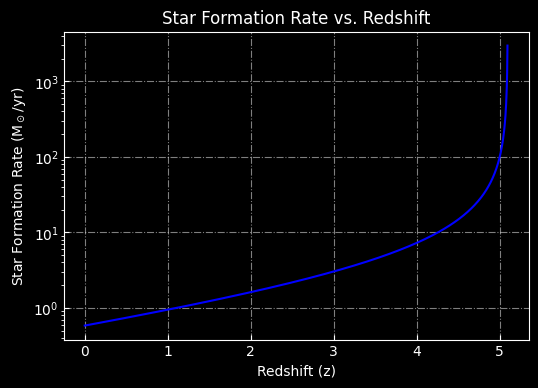

In [97]:
# Calculate star formation rate at each redshift in z_array
z_array = np.arange(0, 5.1, 0.004044409199048374)

# Plot star formation rate as a function of redshift
plt.figure(figsize=(6, 4))
plt.plot(z_array, sf_arrate, 'b-')
plt.xlabel('Redshift (z)')
plt.ylabel('Star Formation Rate (M$_\\odot$/yr)')
plt.grid(ls='-.', alpha=0.5)
#y axis log
plt.yscale('log')
plt.tick_params(direction='in')
plt.title('Star Formation Rate vs. Redshift')

In [101]:
#find the argument where z_array = 3
z3 = np.argmin(np.abs(z_array-3))
print(f'The star forming rate at z=3 is {sf_arrate[z3]:.3f} sollar Masses per year')
print(f'The star forming rate at z=0 is {sf_arrate[0]:.3f} sollar Masses per year')


The star forming rate at z=3 is 3.034 sollar Masses per year
The star forming rate at z=0 is 0.583 sollar Masses per year


## 2.2
> Plot the rest frame g-band magnitude of the galaxy as a function of redshift, from z=0.1 to z=5.


In [103]:
g_band = ['sdss_g']

In [105]:
z_array = np.linspace(0.1, 5, 500)

g_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=g_band) for z in z_array])



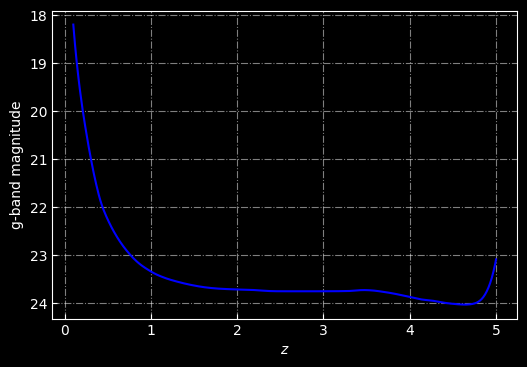

In [106]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-band magnitude')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.3
> Plot the rest frame (g-r) color of the galaxy as a function of redshift over range z=0.1 to z=5.


In [107]:

r_band = ['sdss_r']

r_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=r_band) for z in z_array])



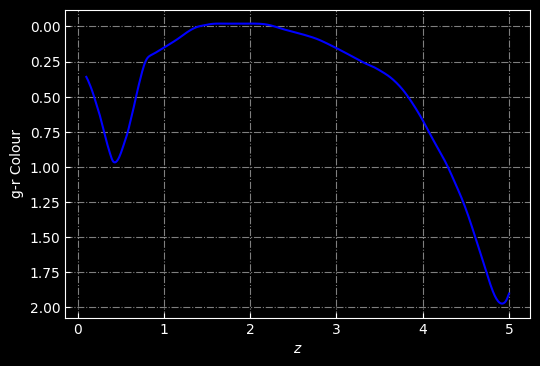

In [108]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z-r_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-r Colour')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.4

>  Repeat 1-3 above assuming the galaxy’s star-formation history had an e-folding timescale of 0.5 Gyr.

In [109]:
sp = StellarPopulation(compute_vega_mags=False, 
                            zcontinuous=0, #continuous star formation history, I want exponential. Burst is zcontinous = 0
                            sfh=1, 
                            tau=0.5,
                            sf_start=0,
                            logzsol=0.0, 
                            dust_type=2, 
                            dust2=0.2,
                            add_stellar_remnants=True,
                            tage=cosmo.age(0).value-cosmo.age(5.1).value)

In [110]:
mass_arr=[10**10.4]
sf_arrate = []
i=0
dt=-0.01
time_range = np.arange(cosmo.age(0).value-cosmo.age(5.1).value, 0, dt)
for i, t in enumerate(time_range):
    sp.params['tage'] = t
    mass_temp=mass_arr[i]-(sp.sfr*mass_arr[i])*(np.abs(dt)*10**7)
    mass_arr.append(mass_temp)
    sf_arrate.append(sp.sfr*mass_arr[i])


Text(0.5, 1.0, 'Star Formation Rate vs. Redshift')

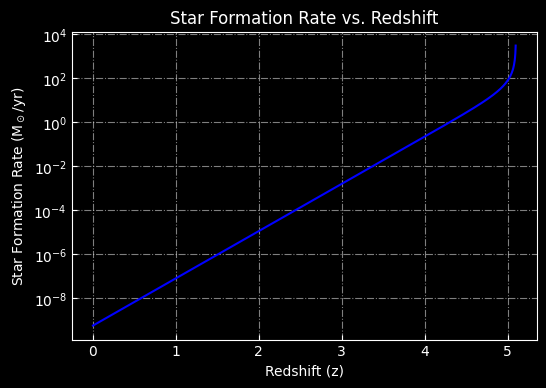

In [111]:
# Calculate star formation rate at each redshift in z_array
z_array = np.arange(0, 5.1, 0.004044409199048374)

# Plot star formation rate as a function of redshift
plt.figure(figsize=(6, 4))
plt.plot(z_array, sf_arrate, 'b-')
plt.xlabel('Redshift (z)')
plt.ylabel('Star Formation Rate (M$_\\odot$/yr)')
plt.grid(ls='-.', alpha=0.5)
#y axis log
plt.yscale('log')
plt.tick_params(direction='in')
plt.title('Star Formation Rate vs. Redshift')

In [112]:
#find the argument where z_array = 3
z3 = np.argmin(np.abs(z_array-3))
print(f'The star forming rate at z=3 is {sf_arrate[z3]:.3f} sollar Masses per year')
print(f'The star forming rate at z=0 is {sf_arrate[0]:.3f} sollar Masses per year')

The star forming rate at z=3 is 0.002 sollar Masses per year
The star forming rate at z=0 is 0.000 sollar Masses per year


In [113]:
z_array = np.linspace(0.1, 4.95, 500)

g_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=g_band) for z in z_array])



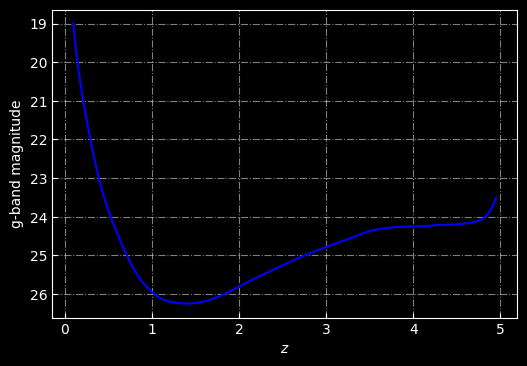

In [114]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-band magnitude')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


In [115]:

r_band = ['sdss_r']

r_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=r_band) for z in z_array])



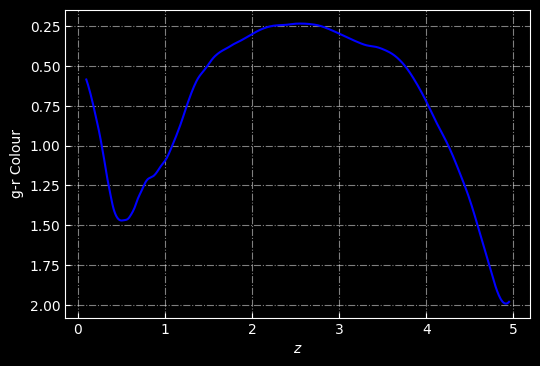

In [116]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z-r_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-r Colour')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()
